In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from news_pop.datas import Dataset
from news_pop.evaluation import (m_r_squared, mean_absolute_error,
                                 pMAE, pMSE, r_squared)
from news_pop.evaluation import plt_corr_matrix, plt_distribution
from news_pop.models import RBFModule, RFECV_


from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge

In [2]:
def Polynomial(X,degree):
    model = PolynomialFeatures(degree)
    update_X = model.fit_transform(X)
    return update_X

In [3]:
##Load Data
data_tr_class = Dataset(feat_dir='NEWS_Training_data.csv',
                      label_dir='NEWS_Training_label.csv')
data_te_class = Dataset(feat_dir='NEWS_Test_data.csv',
                      label_dir='NEWS_Test_label.csv')

X_tr = data_tr_class.fil_norm_feat
Y_tr = data_tr_class.fil_lab
feature_label_tr = data_tr_class.feat_lab

X_tr_org = data_tr_class.feat
Y_tr_org = data_tr_class.lab

#X_te = data_te_class.fil_norm_feat
#Y_te = np.vstack(data_te_class.fil_lab)
#feature_label_te = data_te_class.feat_lab

X_te_org = data_te_class.feat

X_te = data_te_class.norm_feat
Y_te = np.vstack(data_te_class.lab)
feature_label_te = data_te_class.lab

poly = PolynomialFeatures(1)

The features that have large variance is: 
{'self_reference_max_shares', 'kw_max_min', 'kw_max_avg', 'kw_min_max', 'self_reference_avg_sharess', 'kw_avg_avg', 'self_reference_min_shares', 'kw_min_avg', 'kw_max_max', 'kw_avg_max'}

The features that is one-hot is: 
{'data_channel_is_world', 'data_channel_is_entertainment', 'weekday_is_tuesday', 'weekday_is_thursday', 'data_channel_is_tech', 'weekday_is_saturday', 'data_channel_is_bus', 'weekday_is_monday', 'data_channel_is_lifestyle', 'n_non_stop_words', 'weekday_is_friday', 'weekday_is_sunday', 'is_weekend', 'weekday_is_wednesday', 'data_channel_is_socmed'}
The features that have large variance is: 
{'self_reference_max_shares', 'kw_max_min', 'kw_max_avg', 'kw_min_max', 'self_reference_avg_sharess', 'kw_avg_avg', 'self_reference_min_shares', 'kw_min_avg', 'kw_max_max', 'kw_avg_max'}

The features that is one-hot is: 
{'data_channel_is_world', 'data_channel_is_entertainment', 'weekday_is_tuesday', 'weekday_is_thursday', 'data_channel_is

# Sandardized Data

Linear Regression

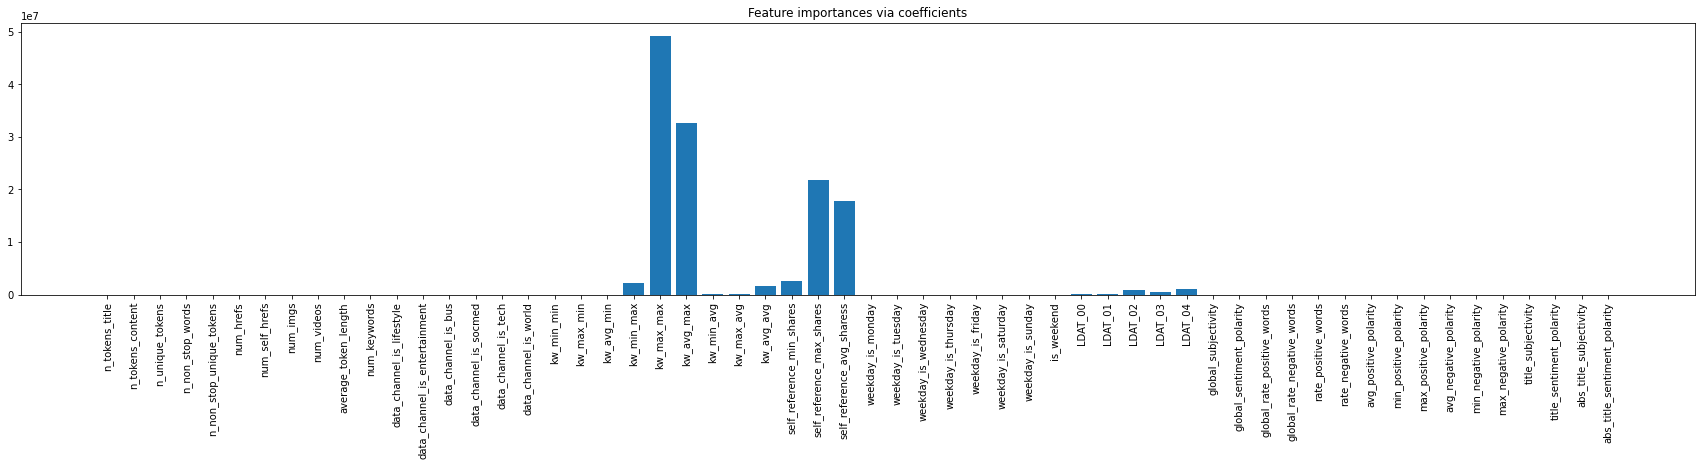

In [20]:
linear_reg = LinearRegression().fit(X_tr, Y_tr)
importance = np.abs(linear_reg.coef_)
plt.bar(height=importance, x = feature_label_tr.ravel())
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [21]:
selector = SelectFromModel(estimator=LinearRegression()).fit(X_tr, Y_tr)
print(selector.get_support())

lg_reduced = LinearRegression().fit(selector.transform(X_tr), Y_tr)
Y_te_pred = np.vstack(lg_reduced.predict(selector.transform(X_te)))

[False False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


In [22]:
mae_lg = mean_absolute_error(Y_te_pred, Y_te)
r2_lg = r_squared(Y_te_pred, Y_te)
pmse_lg = pMSE(Y_te_pred, Y_te, r=10)
pmae_lg = pMAE(Y_te_pred, Y_te, r=10)
mr2_lg = m_r_squared(Y_te_pred, Y_te, r=10)

In [23]:
print("The MAE of reduced feature Linear regression is: ", mae_lg)
print("The R^2 of reduced feature Linear regression is: ", r2_lg[0][0])
print("The pMSE of reduced feature Linear regression is: ", pmse_lg[0][0])
print("The pMAE of reduced feature Linear regression is: ", pmae_lg)
print("The mR^2 of reduced feature Linear regression is: ", mr2_lg[0][0])

The MAE of reduced feature Linear regression is:  7984085.928753576
The R^2 of reduced feature Linear regression is:  -1578614.133703988
The pMSE of reduced feature Linear regression is:  80948528.66340649
The pMAE of reduced feature Linear regression is:  6255.09685145538
The mR^2 of reduced feature Linear regression is:  -9295627.88865424


Lasso Regression

C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3287357068.080078, tolerance: 32524657.93560967
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15328134574.840363, tolerance: 32524657.93560967
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25269444083.54068, tolerance: 32524657.93560967
  model = cd_fast.enet_coordinate_descent_gram(


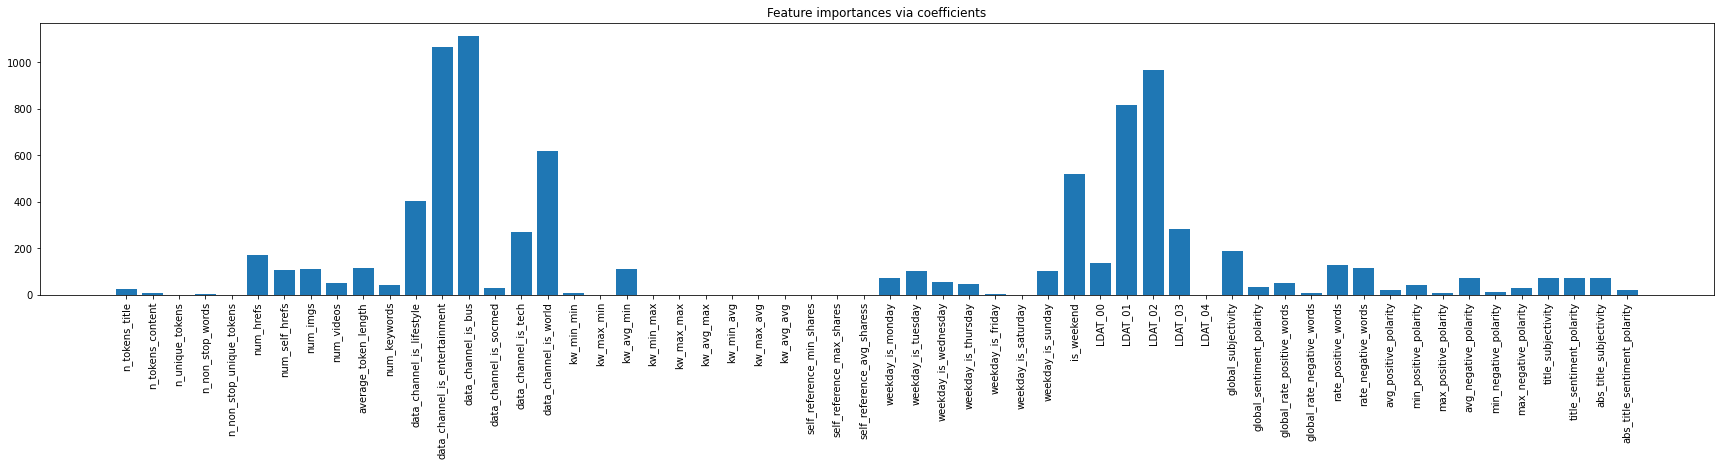

In [24]:
lasso_reg = LassoCV().fit(X_tr, Y_tr)
importance = np.abs(lasso_reg.coef_)
plt.bar(height=importance, x = feature_label_tr.ravel())
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [25]:
selector = SelectFromModel(estimator=LassoCV()).fit(X_tr, Y_tr)
print(selector.get_support())

lasso_reduced = LassoCV().fit(selector.transform(X_tr), Y_tr)
Y_te_pred = np.vstack(lasso_reduced.predict(selector.transform(X_te)))

C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3287357068.080078, tolerance: 32524657.93560967
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15328134574.840363, tolerance: 32524657.93560967
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25269444083.54068, tolerance: 32524657.93560967
  model = cd_fast.enet_coordinate_descent_gram(


[ True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [26]:
mae_lasso = mean_absolute_error(Y_te_pred, Y_te)
r2_lasso = r_squared(Y_te_pred, Y_te)
pmse_lasso = pMSE(Y_te_pred, Y_te, r=10)
pmae_lasso = pMAE(Y_te_pred, Y_te, r=10)
mr2_lasso = m_r_squared(Y_te_pred, Y_te, r=10)
print("The MAE of reduced feature Lasso regression is: ", mae_lasso)
print("The R^2 of reduced feature Lasso regression is: ", r2_lasso[0][0])
print("The pMSE of reduced feature Lasso regression is: ", pmse_lasso[0][0])
print("The pMAE of reduced feature Lasso regression is: ", pmae_lasso)
print("The mR^2 of reduced feature Lasso regression is: ", mr2_lasso[0][0])

The MAE of reduced feature Lasso regression is:  2408.637665538175
The R^2 of reduced feature Lasso regression is:  0.022642274386439176
The pMSE of reduced feature Lasso regression is:  3.989007569494711
The pMAE of reduced feature Lasso regression is:  1.1606005476753194
The mR^2 of reduced feature Lasso regression is:  0.5419270169289937


Ridge Regression

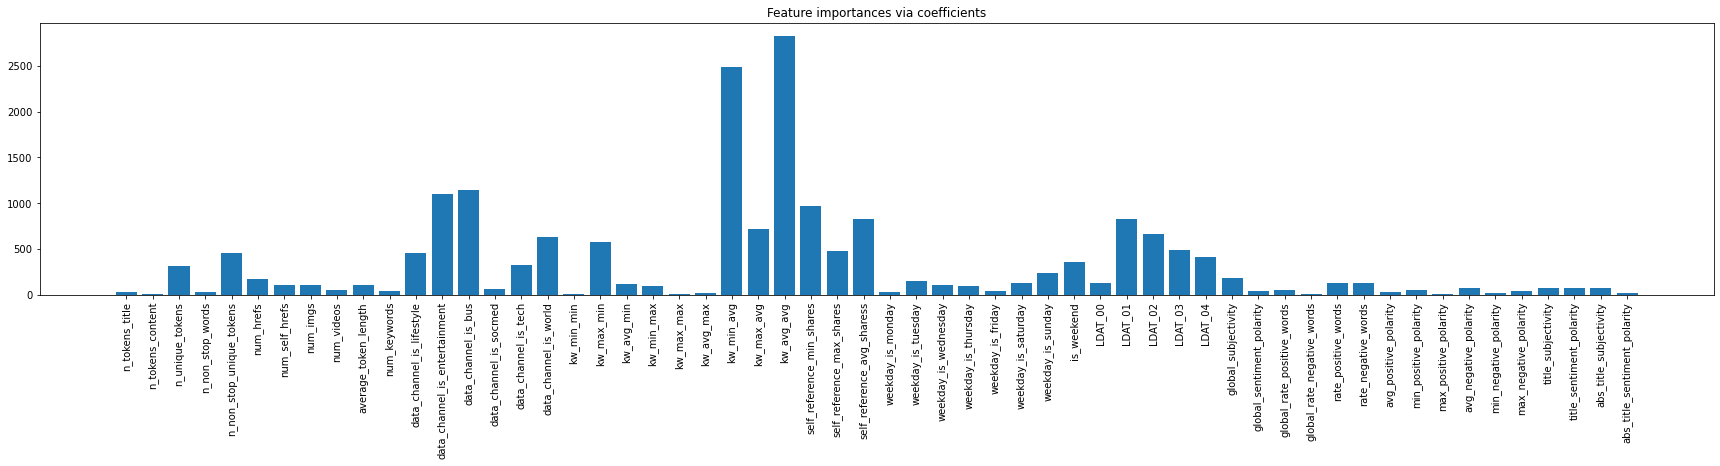

In [27]:
Ridge_reg = Ridge(alpha=1.0).fit(X_tr, Y_tr)
importance = np.abs(Ridge_reg.coef_)
plt.bar(height=importance, x = feature_label_tr.ravel())
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [28]:
selector = SelectFromModel(estimator=Ridge(alpha=1.0)).fit(X_tr, Y_tr)
print(selector.get_support())

lasso_reduced = Ridge(alpha=1.0).fit(selector.transform(X_tr), Y_tr)
Y_te_pred = np.vstack(lasso_reduced.predict(selector.transform(X_te)))

[False False False False  True False False False False False False  True
  True  True False False  True False  True False False False False  True
  True  True  True  True  True False False False False False False False
  True False  True  True  True  True False False False False False False
 False False False False False False False False False False]


In [29]:
mae_ridge = mean_absolute_error(Y_te_pred, Y_te)
r2_ridge = r_squared(Y_te_pred, Y_te)
pmse_ridge = pMSE(Y_te_pred, Y_te, r=10)
pmae_ridge = pMAE(Y_te_pred, Y_te, r=10)
mr2_ridge = m_r_squared(Y_te_pred, Y_te, r=10)
print("The MAE of reduced feature Ridge regression is: ", mae_ridge)
print("The R^2 of reduced feature Ridge regression is: ", r2_ridge[0][0])
print("The pMSE of reduced feature Ridge regression is: ", pmse_ridge[0][0])
print("The pMAE of reduced feature Ridge regression is: ", pmae_ridge)
print("The mR^2 of reduced feature Ridge regression is: ", mr2_ridge[0][0])

The MAE of reduced feature Ridge regression is:  2190.1290851441645
The R^2 of reduced feature Ridge regression is:  -0.016748309638149106
The pMSE of reduced feature Ridge regression is:  2.007256593031893
The pMAE of reduced feature Ridge regression is:  0.7600182950709023
The mR^2 of reduced feature Ridge regression is:  0.769499054754731


    Selected best alpha of ridge

In [30]:
mae_ridge_set = []; r2_ridge_set = []; pmse_ridge_set = []; pmae_ridge_set = []
mr2_ridge_set = []
c = 0
for j in range(24):
    la = math.exp(j-20)
    selector = SelectFromModel(estimator=Ridge(alpha=la)).fit(X_tr, Y_tr)
    #X_tr_ridge_aug =  Polynomial(selector.transform(X_tr),i+1)
    lasso_reduced = Ridge(alpha=la).fit(selector.transform(X_tr), Y_tr)
    #X_te_ridge_aug = Polynomial(selector.transform(X_te),i+1)
    Y_te_pred = np.vstack(lasso_reduced.predict(selector.transform(X_te)))
    
    mae_ridge = mean_absolute_error(Y_te_pred, Y_te)
    r2_ridge = r_squared(Y_te_pred, Y_te)
    pmse_ridge = pMSE(Y_te_pred, Y_te, r=10)
    pmae_ridge = pMAE(Y_te_pred, Y_te, r=10)
    mr2_ridge = m_r_squared(Y_te_pred, Y_te, r=10)
        
    mae_ridge_set.append(mae_ridge)
    r2_ridge_set.append(r2_ridge)
    pmse_ridge_set.append(pmse_ridge)
    pmae_ridge_set.append(pmae_ridge)
    mr2_ridge_set.append(mr2_ridge)
print(mae_ridge_set)

[7798127.285301585, 7316914.497531886, 6573085.780288605, 5156172.045715515, 3354952.482408602, 1707559.272602216, 1932760.4324104642, 1138527.8036113114, 673534.2294378366, 491233.90294038295, 381572.8417012701, 341099.95423282473, 284511.5701273355, 243482.52426888508, 179264.55218068368, 109253.57938252353, 53357.86774421869, 22701.818214662893, 9004.72432753908, 2729.193160002295, 2190.1290851441645, 2337.1691899637412, 2415.805334523227, 2429.991854279491]


We found that When alpha approximate to 1 the ridge have better result

In [31]:
mae_ridge_set = []; r2_ridge_set = []; pmse_ridge_set = []; pmae_ridge_set = []
mr2_ridge_set = []
c = 0
for j in range(20):
    la = 0.3+0.1*j
    selector = SelectFromModel(estimator=Ridge(alpha=la)).fit(X_tr, Y_tr)
    #X_tr_ridge_aug =  Polynomial(selector.transform(X_tr),i+1)
    lasso_reduced = Ridge(alpha=la).fit(selector.transform(X_tr), Y_tr)
    #X_te_ridge_aug = Polynomial(selector.transform(X_te),i+1)
    Y_te_pred = np.vstack(lasso_reduced.predict(selector.transform(X_te)))
    
    mae_ridge = mean_absolute_error(Y_te_pred, Y_te)
    r2_ridge = r_squared(Y_te_pred, Y_te)
    pmse_ridge = pMSE(Y_te_pred, Y_te, r=10)
    pmae_ridge = pMAE(Y_te_pred, Y_te, r=10)
    mr2_ridge = m_r_squared(Y_te_pred, Y_te, r=10)
        
    mae_ridge_set.append(mae_ridge)
    r2_ridge_set.append(r2_ridge)
    pmse_ridge_set.append(pmse_ridge)
    pmae_ridge_set.append(pmae_ridge)
    mr2_ridge_set.append(mr2_ridge)
print(mae_ridge_set)

[3604.848302984076, 2595.8709327108672, 2304.9125805829467, 2221.904773615627, 2190.6470029071465, 2186.1831615020333, 2179.0611142826156, 2190.1290851441645, 2202.3621924246017, 2214.3576099386114, 2225.855124324014, 2236.560768995458, 2246.5675528929496, 2255.8196919391016, 2264.3440986968476, 2272.097886758953, 2280.457796911839, 2286.9648606787564, 2292.9453683419674, 2298.5326451167602]


We found that When alpha equal to 0.9 the ridge have better result

SVR

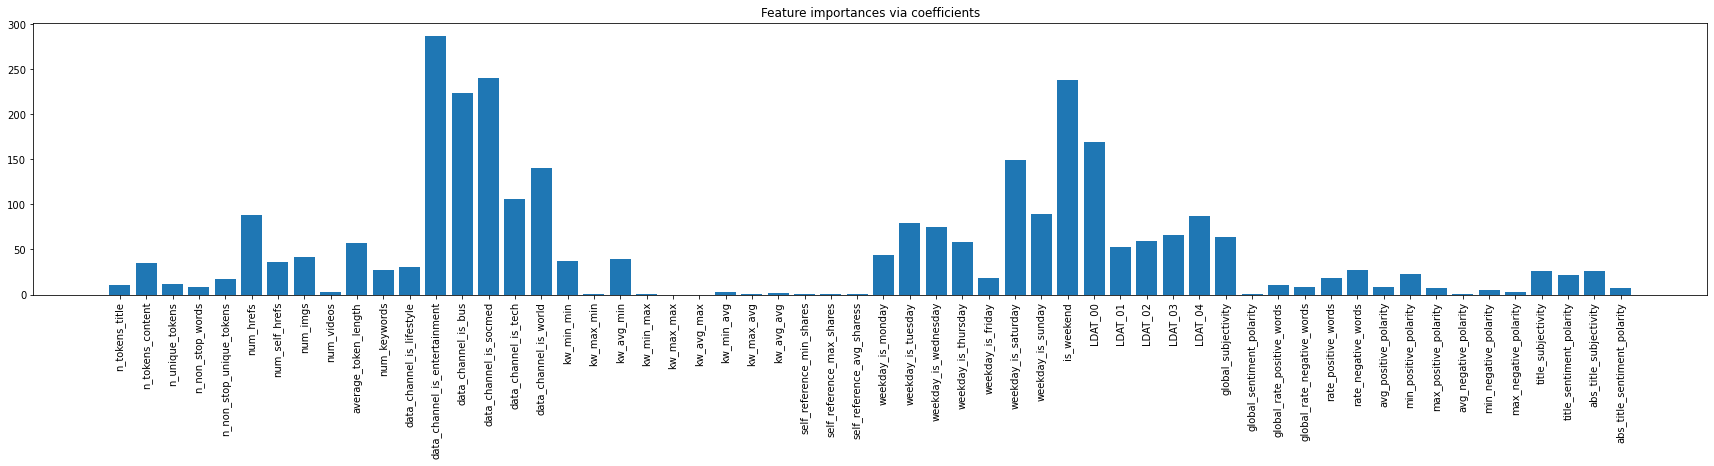

In [33]:
SVR_reg =SVR(kernel="linear").fit(X_tr, Y_tr)
importance = np.abs(SVR_reg.coef_)
plt.bar(height=importance[0], x = feature_label_tr.ravel())
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [34]:
selector = SelectFromModel(estimator=SVR(kernel="linear")).fit(X_tr, Y_tr)
print(selector.get_support())

SVR_reduced = SVR(kernel="linear").fit(selector.transform(X_tr), Y_tr)
Y_te_pred = np.vstack(SVR_reduced.predict(selector.transform(X_te)))

[False False False False False  True False False False  True False False
  True  True  True  True  True False False False False False False False
 False False False False False False  True  True  True False  True  True
  True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False]


In [35]:
mae_SVR = mean_absolute_error(Y_te_pred, Y_te)
r2_SVR = r_squared(Y_te_pred, Y_te)
pmse_SVR = pMSE(Y_te_pred, Y_te, r=10)
pmae_SVR = pMAE(Y_te_pred, Y_te, r=10)
mr2_SVR = m_r_squared(Y_te_pred, Y_te, r=10)
print("The MAE of reduced feature SVR regression is: ", mae_SVR)
print("The R^2 of reduced feature SVR regression is: ", r2_SVR[0][0])
print("The pMSE of reduced feature SVR regression is: ", pmse_SVR[0][0])
print("The pMAE of reduced feature SVR regression is: ", pmae_SVR)
print("The mR^2 of reduced feature SVR regression is: ", mr2_SVR[0][0])

The MAE of reduced feature SVR regression is:  2134.1749770838132
The R^2 of reduced feature SVR regression is:  -0.05574421188482681
The pMSE of reduced feature SVR regression is:  1.1574274272053704
The pMAE of reduced feature SVR regression is:  0.568459914612589
The mR^2 of reduced feature SVR regression is:  0.8670881854617982


In [36]:
SVR_rbf = SVR(kernel="rbf").fit(X_tr, Y_tr)
Y_te_pred = np.vstack(SVR_rbf.predict(X_te))

mae_SVR = mean_absolute_error(Y_te_pred, Y_te)
r2_SVR = r_squared(Y_te_pred, Y_te)
pmse_SVR = pMSE(Y_te_pred, Y_te, r=10)
pmae_SVR = pMAE(Y_te_pred, Y_te, r=10)
mr2_SVR = m_r_squared(Y_te_pred, Y_te, r=10)
print("The MAE of reduced feature SVR rbf regression is: ", mae_SVR)
print("The R^2 of reduced feature SVR rbf regression is: ", r2_SVR[0][0])
print("The pMSE of reduced feature SVR rbf regression is: ", pmse_SVR[0][0])
print("The pMAE of reduced feature SVR rbf regression is: ", pmae_SVR)
print("The mR^2 of reduced feature SVR rbf regression is: ", mr2_SVR[0][0])

The MAE of reduced feature SVR rbf regression is:  2169.924772146972
The R^2 of reduced feature SVR rbf regression is:  -0.07003624632841143
The pMSE of reduced feature SVR rbf regression is:  1.1336307579935478
The pMAE of reduced feature SVR rbf regression is:  0.5837536956380442
The mR^2 of reduced feature SVR rbf regression is:  0.8698208479256087


In [4]:
mae_SVR_set = []; r2_SVR_set = []; pmse_SVR_set = []; pmae_SVR_set = []
mr2_SVR_set = []
C_set = np.logspace(-3,3,10)
for j in range(len(C_set)):
    selector = SelectFromModel(estimator=SVR(kernel="linear", C=C_set[j])).fit(X_tr, Y_tr)
    SVC_reduced = SVR(kernel="linear", C=C_set[j]).fit(selector.transform(X_tr), Y_tr)
    Y_te_pred = np.vstack(SVC_reduced.predict(selector.transform(X_te)))
    
    mae_ridge = mean_absolute_error(Y_te_pred, Y_te)
    r2_ridge = r_squared(Y_te_pred, Y_te)
    pmse_ridge = pMSE(Y_te_pred, Y_te, r=10)
    pmae_ridge = pMAE(Y_te_pred, Y_te, r=10)
    mr2_ridge = m_r_squared(Y_te_pred, Y_te, r=10)
        
    mae_SVR_set.append(mae_ridge)
    r2_SVR_set.append(r2_ridge)
    pmse_SVR_set.append(pmse_ridge)
    pmae_SVR_set.append(pmae_ridge)
    mr2_SVR_set.append(mr2_ridge)

In [9]:
print("mae of different C is: ",mae_SVR_set)
print()
print("Corresponding C value: ",C_set)

mae of different C is:  [2191.6328538916305, 2183.3163723246635, 2166.5675525009146, 2148.6803728732452, 2137.894771323574, 2136.0083010642347, 2134.544382689297, 2776.579530828978, 3155.466509828098, 3327.859136712213]

Corresponding C value:  [1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


When C = 10, this model has beset result